In [1]:
from   IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from scipy.integrate import solve_ivp
import numpy as np, pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import torch
import gpytorch
import math

In [9]:
from GPutils import add_fwd_cols, updatePLT, ExactGPModel, solveLotkaVolterra

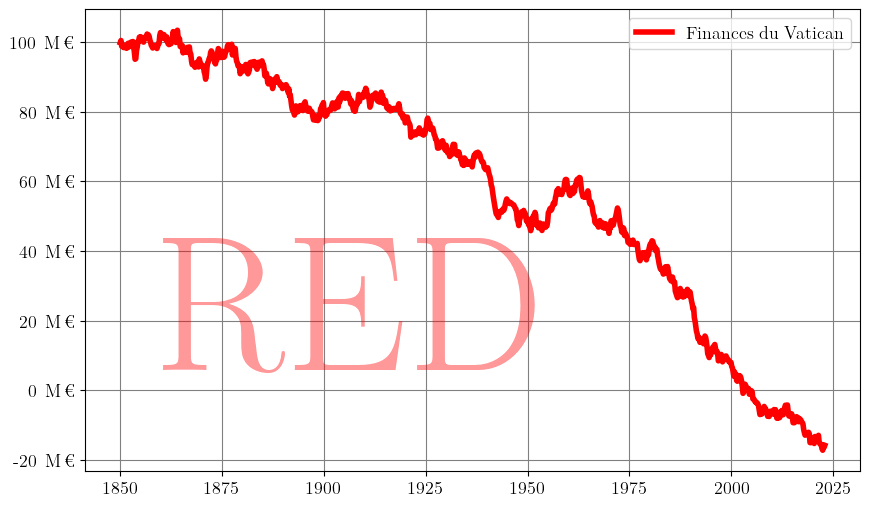

In [224]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='r', ls='-', lw=4) #.plot()
ax.grid(color='gray')
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

ax.text(0.1, 0.5, 'RED', transform=ax.transAxes, fontsize=140,
        verticalalignment='top', alpha=0.4, rotation=0, color='red')


plt.savefig('option1.pdf')
plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

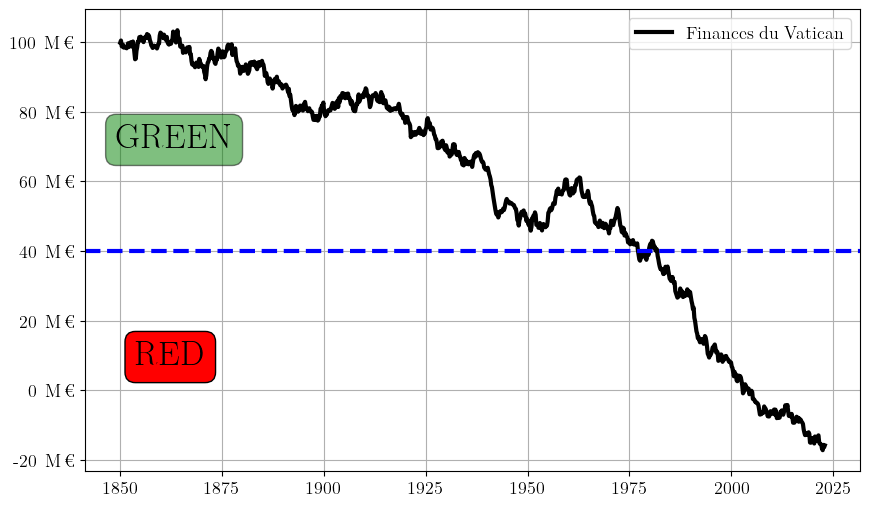

In [192]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.04, 0.75, 'GREEN', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='red', alpha=1)

ax.text(0.065, 0.28, 'RED', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.savefig('option2.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

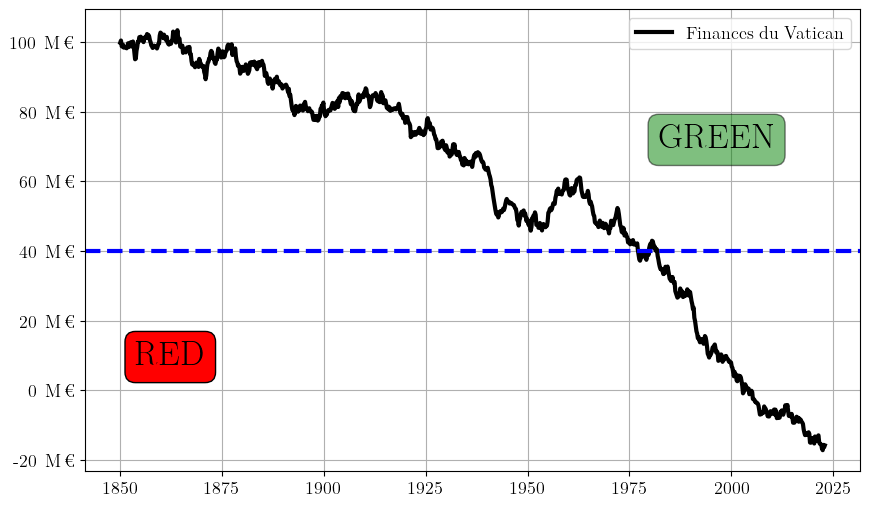

In [193]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.74, 0.75, 'GREEN', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='red', alpha=1)

ax.text(0.065, 0.28, 'RED', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.savefig('option3.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

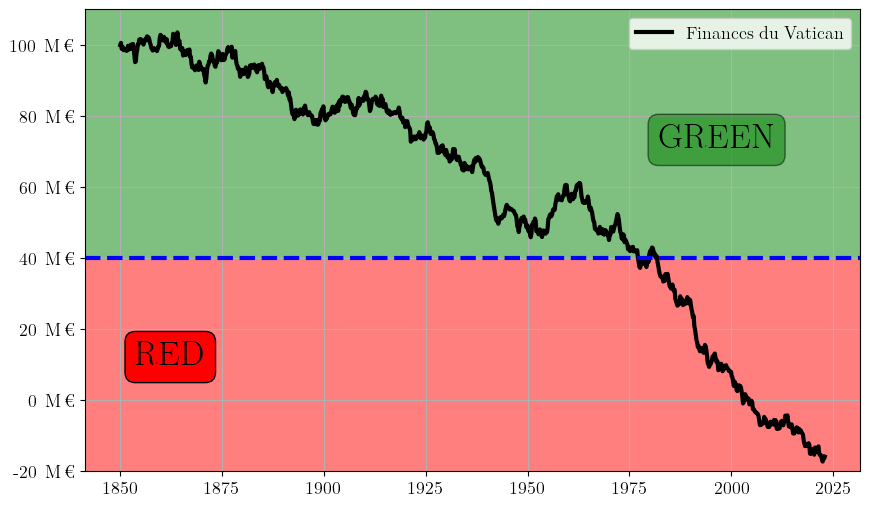

In [194]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.74, 0.75, 'GREEN', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='red', alpha=1)

ax.text(0.065, 0.28, 'RED', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

ax.axhspan(-30, 40, facecolor='red', alpha=0.5)
ax.axhspan(40, 110, facecolor='green', alpha=0.5)

ax.set_ylim(-20, 110)
plt.savefig('option4.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

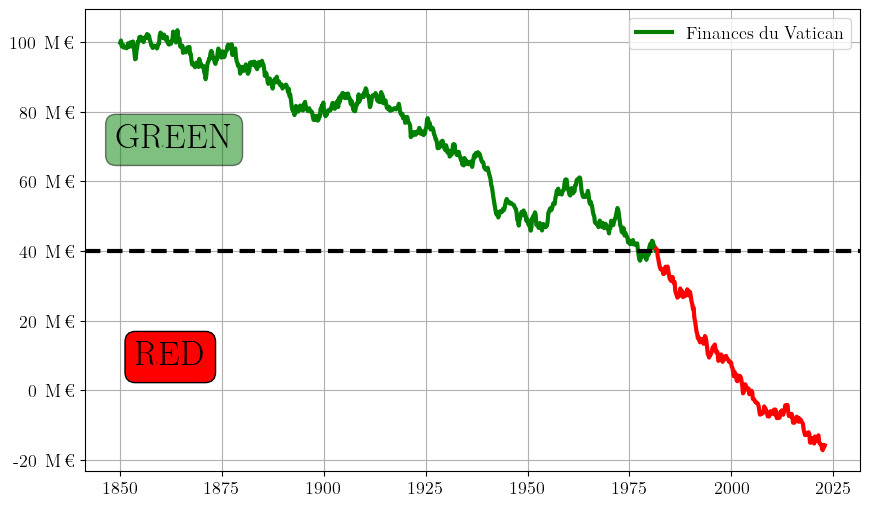

In [195]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)

cutoff= 760
ax.plot(ts[:cutoff], pd.DataFrame( Z + mu*dts ).cumsum().iloc[:cutoff], color='green', ls='-', lw=3) #.plot()
ax.plot(ts[cutoff:], pd.DataFrame( Z + mu*dts ).cumsum().iloc[cutoff:], color='red', ls='-', lw=3) #.plot()

ax.grid()
ax.axhline(40, color='k', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

props = dict(boxstyle='round', facecolor='green', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.04, 0.75, 'GREEN', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='red', alpha=1)

ax.text(0.065, 0.28, 'RED', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.savefig('option5.pdf')
plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

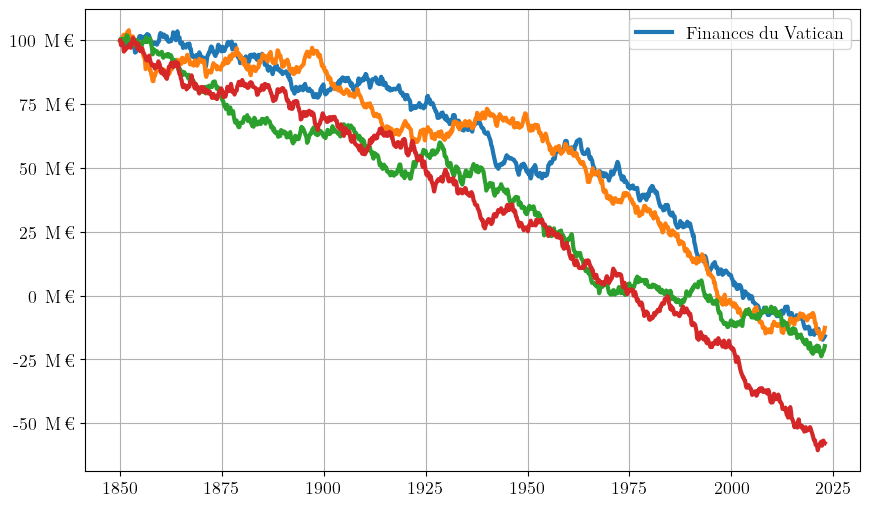

In [196]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)

for i in range(4):
    Z       = np.random.randn((nb_t))
    Z[0]    = 100
    ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), ls='-', lw=3) #.plot() # color='k',

ax.grid()
#ax.axhline(40, color='k', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')


plt.savefig('option6.pdf')
plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

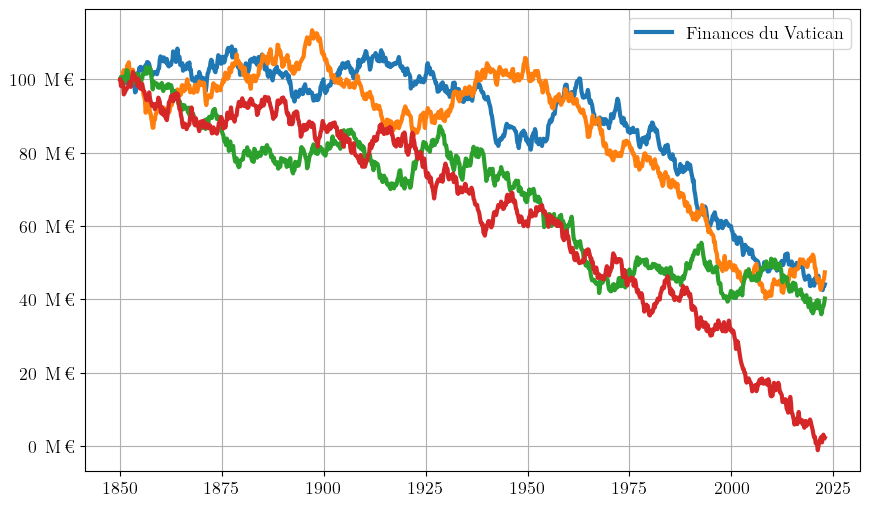

In [197]:
np.random.seed(10)

mu        = -0.4
dt, nb_t  = 0.1, 1000
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)

for i in range(4):
    Z       = np.random.randn((nb_t))
    Z[0]    = 100
    ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), ls='-', lw=3) #.plot() # color='k',

ax.grid()
#ax.axhline(40, color='k', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')


plt.savefig('option6.pdf')
plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

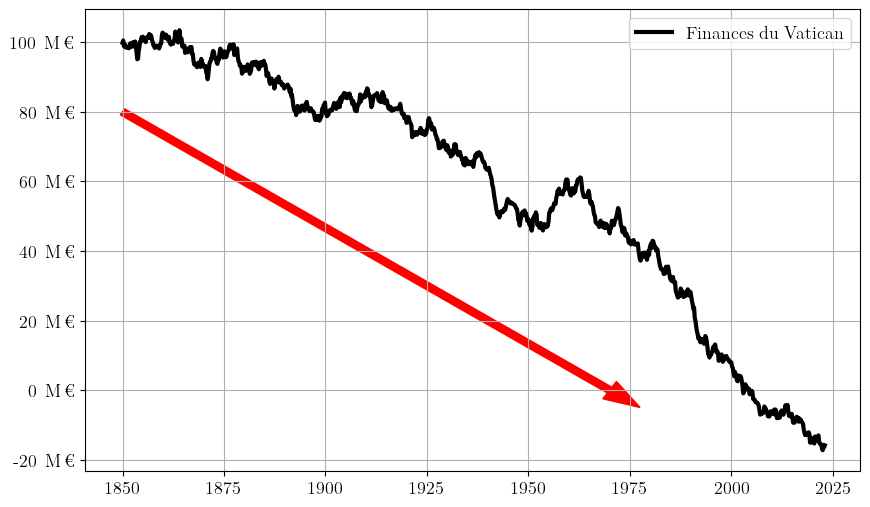

In [198]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
#ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

ax.arrow(1850, 80, 120, -80, width=2, color='red')


plt.savefig('option7.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

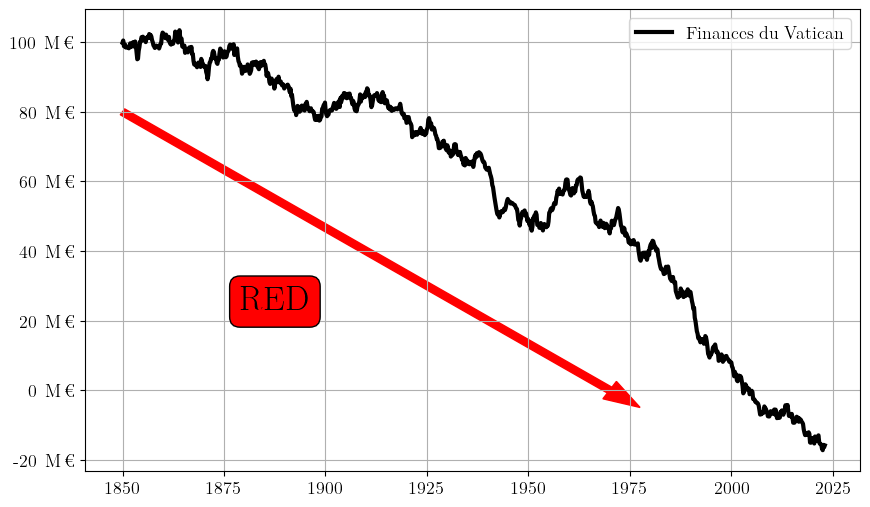

In [199]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
#ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

ax.arrow(1850, 80, 120, -80, width=2, color='red')


ax.text(0.2, 0.4, 'RED', transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)


plt.savefig('option7.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

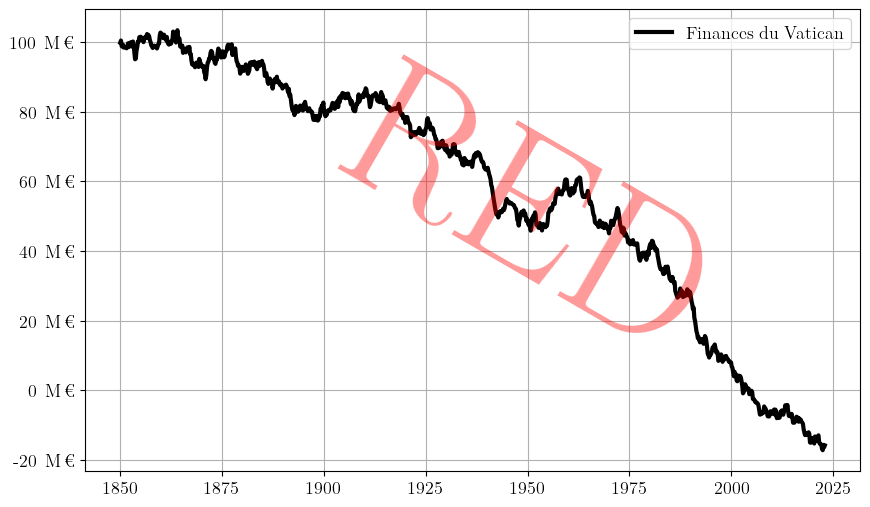

In [200]:
np.random.seed(10)

mu        = -1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
#ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vatican'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

#ax.arrow(1850, 80, 120, -80, width=2, color='red')


ax.text(0.3, 0.9, 'RED', transform=ax.transAxes, fontsize=140,
        verticalalignment='top', alpha=0.4, rotation=-30, color='red')


plt.savefig('option8.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

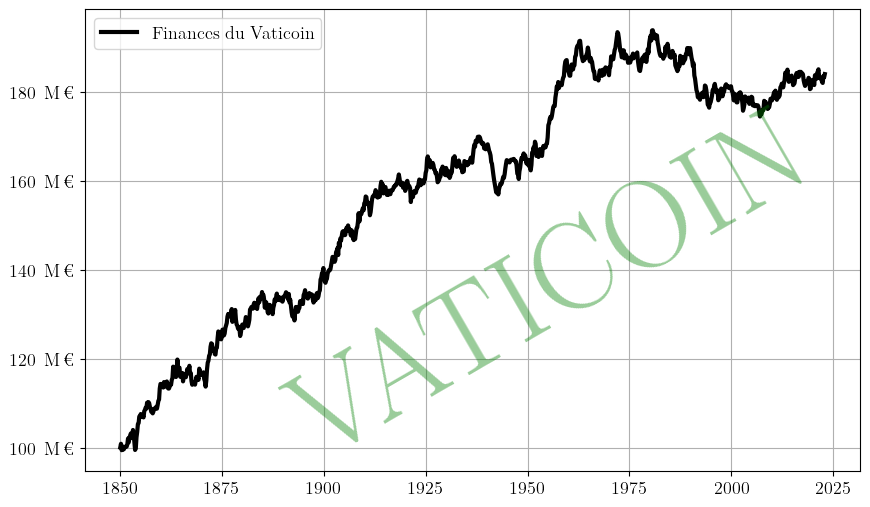

In [201]:
np.random.seed(10)

mu        = 1
dt, nb_t  = 0.1, 1000
Z       = np.random.randn((nb_t))
Z[0]    = 100
dts     = np.ones((nb_t)) * dt
ts      = np.linspace(1850, 2023, nb_t)
updatePLT(W=10, l=10, w=6, fontsize=13)

fix, ax = plt.subplots(1, 1)
ax.plot(ts, pd.DataFrame( Z + mu*dts ).cumsum(), color='k', ls='-', lw=3) #.plot()
ax.grid()
#ax.axhline(40, color='b', ls='--', lw=3)
ax.legend(['Finances du Vaticoin'])

import matplotlib.ticker as mtick
fmt = '{x:,.0f} \,M\,€ '
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
#ax.set_title('Finances - Vatican')

#ax.arrow(1850, 80, 120, -80, width=2, color='red')


ax.text(0.25, 0.8, 'VATICOIN', transform=ax.transAxes, fontsize=90,
        verticalalignment='top', alpha=0.4, rotation=30, color='green')


plt.savefig('option9.pdf')

plt.show()

#plt.plot(np.linspace(-1, 1, 100), conditions)

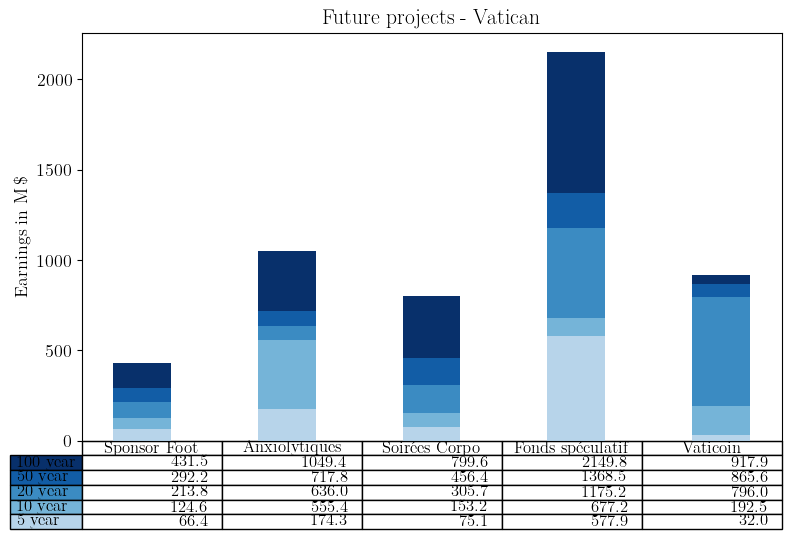

In [219]:
import numpy as np
import matplotlib.pyplot as plt

updatePLT(W=10, l=10, w=6, fontsize=13)

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Sponsor Foot', 'Anxiolytiques', 'Soirées Corpo', 'Fonds spéculatif', 'Vaticoin')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.Blues(np.linspace(0.3, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes

the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel(f"Earnings in M\,\$")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Future projects - Vatican')
plt.savefig('Projects2.pdf')
plt.show()

# Some plots

In [257]:
from scipy.integrate import solve_ivp
import numpy as np, pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import torch
import gpytorch
import math, datetime
from pathlib import Path
from IPython.display import clear_output

from GPutils import add_fwd_cols, updatePLT #, ExactGPModel, solveLotkaVolterra

In [258]:
def get_LOB_data(data_path, asset_name, trade_date):
    LOB_data_path = os.path.join(data_path,  f'{asset_name}_{trade_date}_34200000_57600000_orderbook_1.csv')
    LOB_data      = pd.read_csv(LOB_data_path,
                                usecols   = [0, 1, 2, 3],
                                engine    = 'c',
                                index_col = None,
                                header    = None,
                                infer_datetime_format = True)
    
    LOB_messages = pd.read_csv( os.path.join(data_path,  f'{asset_name}_{trade_date}_34200000_57600000_message_1.csv'), 
                               usecols   = [0, 1, 2, 3, 5],
                               engine    = 'c',
                               index_col = 0,
                               header    = None)
    
    LOB_data.index = LOB_messages.index
    LOB_data.columns = [f'ask_1', f'ask_volume_1', f'bid_1', f'bid_volume_1']
    LOB_data.index.name = 'time'
    LOB_data     = LOB_data.reset_index(drop=False).groupby('time').last()
    LOB_messages = LOB_messages.reset_index(drop=False).groupby('time').last()
    
    #LOB_messages = LOB_messages.loc[LOB_data.index]
    return LOB_data, LOB_messages

In [259]:
def get_LOB_features(LOB_data, LOB_messages, trade_date, tick_size):
    # keep relevant events
    keepOrdersIndex = LOB_messages[LOB_messages.iloc[:, 0].apply(lambda x: x in (1, 2, 3, 4))].index
    LOB_data     = LOB_data.loc[keepOrdersIndex]
    LOB_messages = LOB_messages.loc[LOB_data.index]
    
    # sequence indicators
    LOB_messages.loc[LOB_messages[LOB_messages.iloc[:, 0].apply(lambda x: x in (2, 3))].index, "1"] = 'C'
    LOB_messages.loc[LOB_messages[LOB_messages.iloc[:, 0].apply(lambda x: x in (1,))].index, "1"]   = 'L'
    LOB_messages.loc[LOB_messages[LOB_messages.iloc[:, 0].apply(lambda x: x in (4,))].index, "1"] = 'M'
    LOB_data['direction']  = LOB_messages.loc[:, 5].values
    
    # Net order flow at the best bid/ask
    LOB_data['orderType']       = LOB_messages[f"1"]
    LOB_data['orderTypeFlow']   = LOB_messages[f"1"]
    LOB_data.loc[ LOB_data[LOB_data['orderTypeFlow'] == 'L'].index, "orderTypeFlow"]  = 1
    LOB_data.loc[ LOB_data[LOB_data['orderTypeFlow'] == 'C'].index, "orderTypeFlow"] = -1    
    LOB_data.loc[ LOB_data[LOB_data['orderTypeFlow'] == 'M'].index, "orderTypeFlow"] = -1    

    LOB_data['ask_net_order_flow'] = LOB_data[LOB_data.direction == 1].orderTypeFlow.dropna().astype(int).rolling(100).mean()
    LOB_data['bid_net_order_flow'] = LOB_data[LOB_data.direction == -1].orderTypeFlow.dropna().astype(int).rolling(100).mean()
    LOB_data['ask_net_order_flow'] = LOB_data['ask_net_order_flow'].fillna(method='ffill')
    LOB_data['bid_net_order_flow'] = LOB_data['bid_net_order_flow'].fillna(method='ffill')
    
    # Message data
    LOB_data.loc[ LOB_data[LOB_data['direction'] == 1].index, "direction"]  = 'B'
    LOB_data.loc[ LOB_data[LOB_data['direction'] == -1].index, "direction"] = 'S'    
    LOB_data["message"]    = LOB_data['direction'] +  LOB_messages[f"1"]
    
    # create features
    LOB_data['mid_price']       = (LOB_data['ask_1'] + LOB_data['bid_1'])/2
    LOB_features                = LOB_data[['mid_price']]/ 10000
    
    LOB_features['ask_1']       = LOB_data['ask_1']
    LOB_features['bid_1']       = LOB_data['bid_1']
    LOB_features['imbalance_1'] = (LOB_data['bid_volume_1'] - LOB_data['ask_volume_1'])/(LOB_data['bid_volume_1'] + LOB_data['ask_volume_1'])
    LOB_features['ba_spread']   = (LOB_data['ask_1'] - LOB_data['bid_1'])/10000
    LOB_features['timestamp']   = [datetime.datetime.strptime(trade_date, '%Y-%m-%d') + datetime.timedelta(seconds=i) for i in LOB_features.index]    

    LOB_features['bid_volume_1']       = LOB_data['bid_volume_1']
    LOB_features['ask_volume_1']       = LOB_data['ask_volume_1']
    LOB_features['message']            = LOB_data['message']
    
    LOB_features['bid_net_order_flow'] = LOB_data['bid_net_order_flow']
    LOB_features['ask_net_order_flow'] = LOB_data['ask_net_order_flow']
    
    if False:
        micro = (LOB_features['bid_volume_1'].mul(LOB_features['ask_1'])).div(LOB_features['ask_volume_1'].add(LOB_features['bid_volume_1'])) \
                    + (LOB_features['ask_volume_1'].mul(LOB_features['bid_1'])).div(LOB_features['ask_volume_1'].add(LOB_features['bid_volume_1']))
        micro = ((micro/1e4 - LOB_features.mid_price)/LOB_features.mid_price)
        micro = micro/micro.abs().max()
        LOB_features['micro'] = micro.values
    
    timeofday = ((LOB_features.timestamp.astype('datetime64[%s]' % 'h') - \
                LOB_features.timestamp.astype('datetime64[%s]' % 'D')).values/3600000000000).astype(float) + \
                (((LOB_features.timestamp.astype('datetime64[%s]' % 'm')-\
                 LOB_features.timestamp.astype('datetime64[%s]' % 'h')).values/60000000000).astype(float)/60).round(1)
    LOB_features['time_of_day'] = timeofday
    
    return LOB_features, LOB_messages

In [260]:
asset_name         = 'INTC'
tick_size          = 0.01
data_path          = Path(os.path.abspath(os.path.join('..')), "data", "Raw")
feat_path          = Path(os.path.abspath(os.path.join('..')), "data", "Features")

# predictive horizon 
fwd_cols   = []
#fwd_col_ls = (1, 5, 10, 20, 50, 40, 60, 100, 300, 500, 1000)
fwd_col_ls = [int(s) for s in np.linspace(10, 1000, 31)]
fwd_col_ls = [50, 100, 200]
for w in fwd_col_ls:
    fwd_cols += [f'fwd_price_move_{w}']

In [261]:
i = 0
for filename in os.listdir(data_path):
    i += 1
    f = os.path.join(data_path, filename)
    if 'orderbook' in f:
        if os.path.isfile(f):
            trade_date = f.split('_')[2]
            print('*****************************************')
            print('*     ', asset_name)
            print('*****************************************')
            print('%: ', 100*(round(i/len(os.listdir(os.path.join(data_path))), 2)) , "%")
            print('File name: ', filename)
            #if not os.path.isfile(f'{str(feat_path)}/{asset_name}_{trade_date}_LOB_features.pkl'):
                #try:
            LOB_data, LOB_messages      = get_LOB_data(data_path, asset_name, trade_date)
            print('got the data')
            LOB_features, LOB_messages  = get_LOB_features(LOB_data, LOB_messages, trade_date, tick_size)
            LOB_features.to_pickle(f'{str(feat_path)}/{asset_name}_{trade_date}_LOB_features.pkl')
            LOB_features = LOB_features.set_index('timestamp')
                #except Exception as e:
                #    print('Error: ', str(e))
            clear_output(wait=True)

*****************************************
*      INTC
*****************************************
%:  98.0 %
File name:  INTC_2023-03-08_34200000_57600000_orderbook_1.csv
got the data


In [265]:
predictive_feature = 'ask_net_order_flow'

cutoff_count   = 10
filenames      = os.listdir(feat_path)
trade_dates    = np.sort([fn.split('_')[1] for fn in filenames if asset_name in fn])
dic_results    = {}

print('Building the predictive surface from dates:', trade_dates)

for trade_date in trade_dates:
    #print('Reading:',trade_date)
    features_fn   = f'{asset_name}_{trade_date}_LOB_features.pkl'
    try:
        LOB_features = pd.read_pickle(f'{feat_path}/{features_fn}')
        
        LOB_features[predictive_feature] = LOB_features[predictive_feature].round(2) 
        add_fwd_cols(fwd_cols, LOB_features)
        LOB_features_predictive = LOB_features[[predictive_feature] + fwd_cols].dropna()
        
        counts = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).count())
        avgs   = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).mean())
        avgs[counts<cutoff_count]=np.nan
        avgs = avgs.sort_index()

        dic_results[trade_date] = (counts, avgs)
    
    except Exception as e:
        print('Could not load asset ', asset_name, 'for date', trade_date)
        print(str(e))

Building the predictive surface from dates: ['2023-01-03' '2023-01-04' '2023-01-05' '2023-01-06' '2023-01-09'
 '2023-01-10' '2023-01-30' '2023-01-31' '2023-02-01' '2023-02-02'
 '2023-02-03' '2023-02-06' '2023-02-07' '2023-02-08' '2023-02-09'
 '2023-02-10' '2023-02-13' '2023-02-14' '2023-02-15' '2023-02-16'
 '2023-02-17' '2023-02-21' '2023-02-22' '2023-02-23' '2023-02-24'
 '2023-02-27' '2023-02-28' '2023-03-01' '2023-03-02' '2023-03-03'
 '2023-03-06' '2023-03-07' '2023-03-08' '2023-03-09' '2023-03-10'
 '2023-03-13' '2023-03-14' '2023-03-15' '2023-03-16' '2023-03-17'
 '2023-03-20' '2023-03-21' '2023-03-22' '2023-03-23' '2023-03-24'
 '2023-03-27' '2023-03-28' '2023-03-29' '2023-03-30' '2023-03-31']


In [266]:
avg_results  = {}
_results     = {}
smooth_w     = 1

# Cleaning of results
avg_results[asset_name] = {}
tmp_dico = {}
for s in dic_results.keys():
    counts, avgs = dic_results[s]
    avgs = avgs/tick_size # avgs / asset_stats[asset_name]['avg_baspread'] / tick_size
    tmp_dico[s] = avgs.sort_index()

for fwd_col in fwd_cols:
    avg_results[fwd_col] = pd.concat((tmp_dico[s][fwd_col] for s in tmp_dico.keys()), axis=1).sort_index().mean(axis=1)
    avg_results[fwd_col] = avg_results[fwd_col][::-1].rolling(smooth_w).mean()[::-1].rolling(smooth_w).mean()

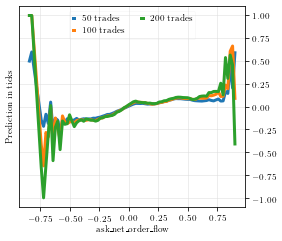

In [267]:
updatePLT(W=4, l=7, w=6, fontsize=9)

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True 
plt.rcParams['ytick.left']  = plt.rcParams['ytick.labelleft'] = False

fig, ax = plt.subplots(1, 1, sharey=True, sharex=True)

for i in range(len(fwd_cols)):
    avgs    = avg_results[fwd_cols[i]]
    ax.plot(avgs.dropna(), lw=3)

ax.grid(axis='both', color='gainsboro', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.yaxis.set_label_position("left")

ax.legend([f'{s} trades'  for s in fwd_col_ls], loc='upper center', fancybox=True, framealpha=0.1, handlelength=0.2, ncol=2)
ax.set_ylabel('Prediction in ticks')
ax.set_xlabel(predictive_feature)

plt.tight_layout()
#plt.savefig(f'results/Predictive_Power_Imbalance.pdf', bbox_inches='tight')